In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

%matplotlib inline

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
shot = pd.read_csv('data.csv')

In [3]:

shot.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [4]:
shot.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64

In [5]:
shot.dropna(how = 'any', inplace = True)
shot.isnull().sum()

action_type           0
combined_shot_type    0
game_event_id         0
game_id               0
lat                   0
loc_x                 0
loc_y                 0
lon                   0
minutes_remaining     0
period                0
playoffs              0
season                0
seconds_remaining     0
shot_distance         0
shot_made_flag        0
shot_type             0
shot_zone_area        0
shot_zone_basic       0
shot_zone_range       0
team_id               0
team_name             0
game_date             0
matchup               0
opponent              0
shot_id               0
dtype: int64

In [6]:
#seeing a tally of the makes and the misses
shot[['shot_made_flag', 'shot_id']].groupby('shot_made_flag').count()



,shot_id
shot_made_flag,
0.0,14232
1.0,11465


In [7]:
#summarizing the numberical data
shot.describe(include = ['number'])

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.569700e+04,25697.000000
mean,249.348679,2.474109e+07,33.953043,7.148422,91.257345,-118.262652,4.886796,2.520800,0.146243,28.311554,13.457096,0.446161,1.610613e+09,15328.166946
std,149.778520,7.738108e+06,0.088152,110.073147,88.152106,0.110073,3.452475,1.151626,0.353356,17.523392,9.388725,0.497103,0.000000e+00,8860.462397
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,2.000000
25%,111.000000,2.050006e+07,33.884300,-67.000000,4.000000,-118.336800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7646.000000
50%,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15336.000000
75%,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,22976.000000
max,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [8]:
#summarizing the categorical data

shot.describe(include = ['object', 'category'])

,action_type,combined_shot_type,season,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,game_date,matchup,opponent
count,25697,25697,25697,25697,25697,25697,25697,25697,25697,25697,25697
unique,55,6,20,2,6,7,5,1,1558,74,33
top,Jump Shot,Jump Shot,2005-06,2PT Field Goal,Center(C),Mid-Range,Less Than 8 ft.,Los Angeles Lakers,2016-04-13,LAL @ SAS,SAS
freq,15836,19710,1924,20285,11289,10532,7857,25697,43,853,1638


In [9]:
shot.dtypes

action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                  int64
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag        float64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_id                 int64
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
dtype: object

In [ ]:
print(shot.action_type.unique())
print(shot.shot_zone_area.unique())
print(shot.shot_type.unique())
print(shot.shot_zone_basic.unique())
print(shot.shot_zone_range.unique())

In [10]:
#add minutes and time to one column to make the data more useful and also a little cleaner. time_remaining is measured in seconds 

shot['time_remaining'] = shot['minutes_remaining']*60 + shot['seconds_remaining'] 
shot.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,time_remaining
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,622
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,465
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,412
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,379
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6,572


In [11]:
# split home or away
shot['home/away'] = np.where(shot['matchup'].str.startswith('LAL @'), 'AWAY', 'HOME')
shot.head()


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,time_remaining,home/away
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,622,AWAY
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,465,AWAY
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,412,AWAY
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,379,AWAY
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6,572,AWAY


In [12]:
#convert the date to year and month for improved accuracy

shot['game_year'] = pd.to_datetime(shot['game_date']).dt.strftime('%Y')
shot['game_month'] = pd.to_datetime(shot['game_date']).dt.strftime('%m')


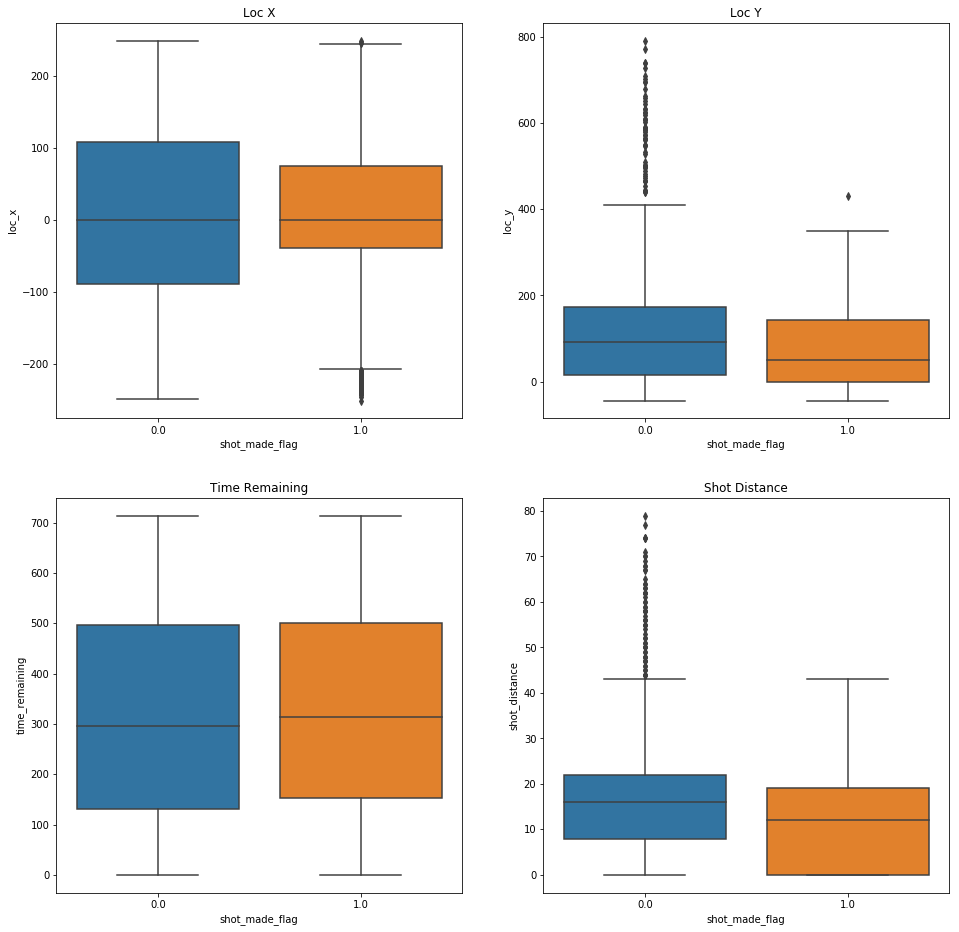

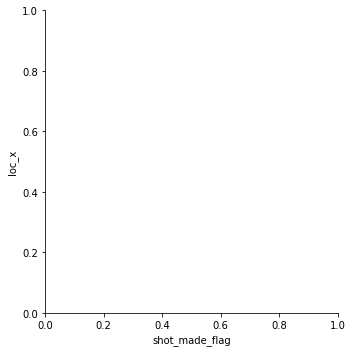

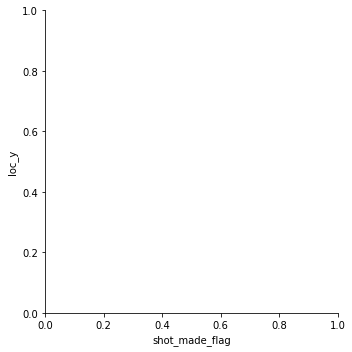

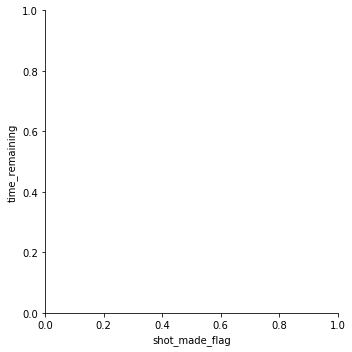

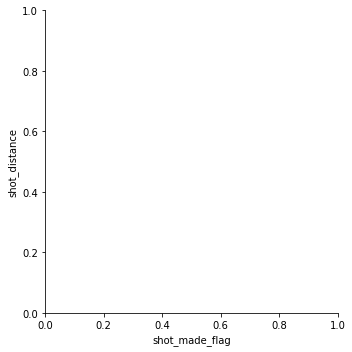

In [35]:
#visualize some of our data tp get a better understanding
f, axarr = plt.subplots(2, 2, figsize=(16, 16))

sns.catplot(x="shot_made_flag", y="loc_x", kind="box", data=shot, ax=axarr[0,0])
sns.catplot(x="shot_made_flag", y="loc_y", kind="box", data=shot, ax=axarr[0,1])
sns.catplot(x="shot_made_flag", y="time_remaining", kind="box", data=shot, ax=axarr[1,0])
sns.catplot(x="shot_made_flag", y="shot_distance", kind="box", data=shot, ax=axarr[1,1])

axarr[0, 0].set_title('Loc X')
axarr[0, 1].set_title('Loc Y')
axarr[1, 0].set_title('Time Remaining')
axarr[1, 1].set_title('Shot Distance')

plt.tight_layout()
plt.show()




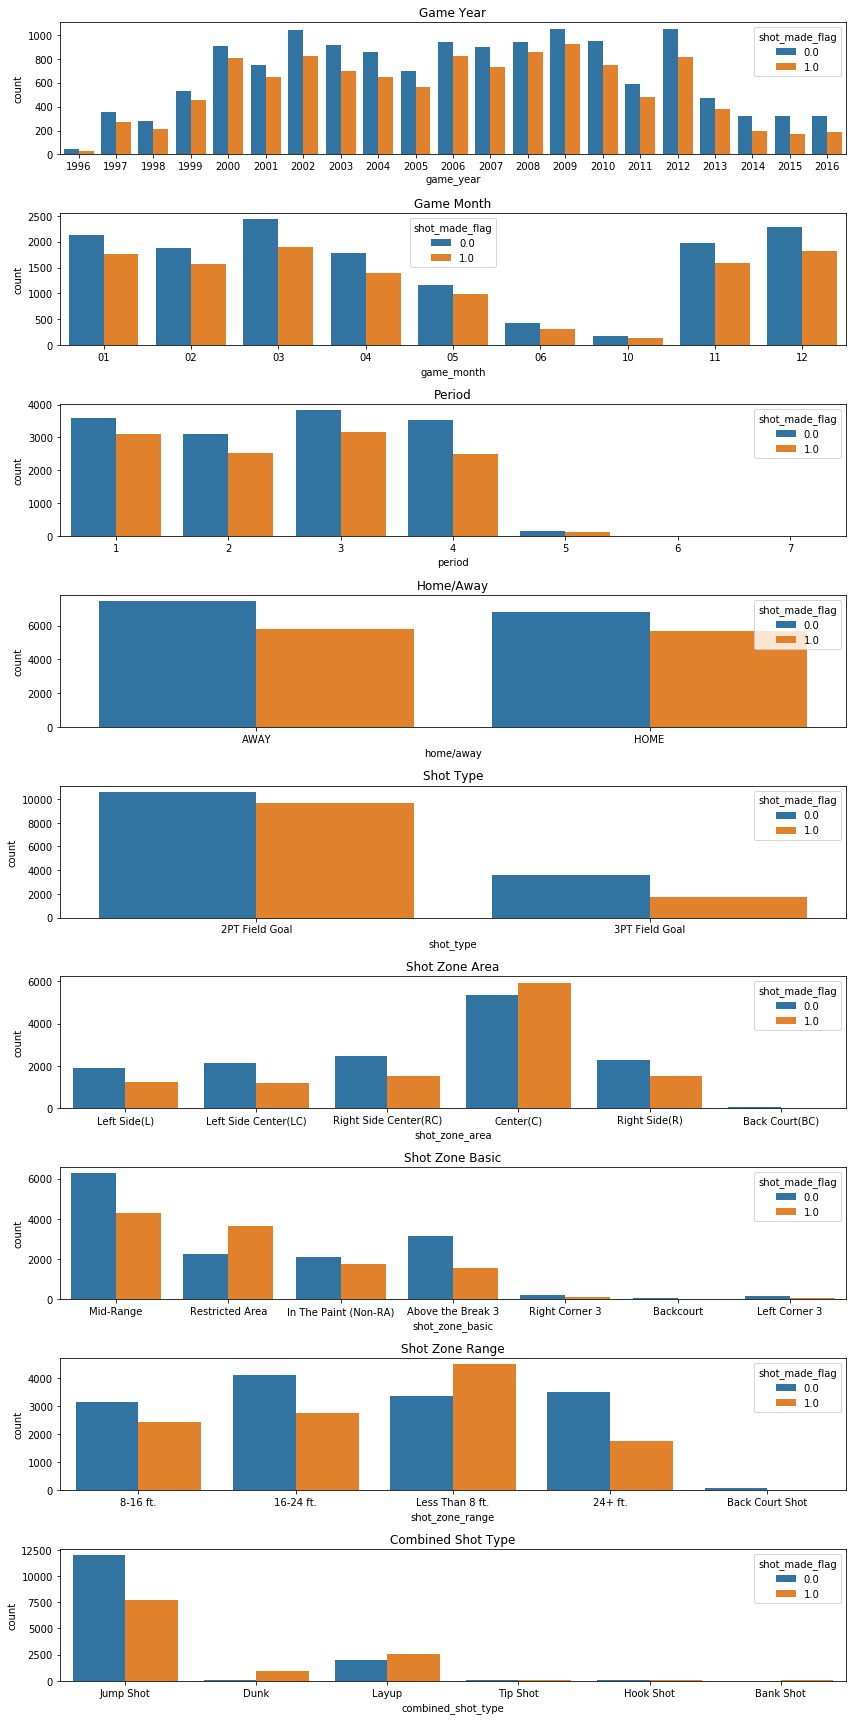

In [36]:
#visualization part 2

f, axarr = plt.subplots(9, figsize=(12, 24))

sns.countplot(x="game_year", hue="shot_made_flag", data=shot, ax=axarr[0])
sns.countplot(x="game_month", hue="shot_made_flag", data=shot, ax=axarr[1])
sns.countplot(x="period", hue="shot_made_flag", data=shot, ax=axarr[2])
sns.countplot(x="home/away", hue="shot_made_flag", data=shot, ax=axarr[3])
sns.countplot(x="shot_type", hue="shot_made_flag", data=shot, ax=axarr[4])
sns.countplot(x="shot_zone_area", hue="shot_made_flag", data=shot, ax=axarr[5])
sns.countplot(x="shot_zone_basic", hue="shot_made_flag", data=shot, ax=axarr[6])
sns.countplot(x="shot_zone_range", hue="shot_made_flag", data=shot, ax=axarr[7])
sns.countplot(x="combined_shot_type", hue="shot_made_flag", data=shot, ax=axarr[8])

axarr[0].set_title('Game Year')
axarr[1].set_title('Game Month')
axarr[2].set_title('Period')
axarr[3].set_title('Home/Away')
axarr[4].set_title('Shot Type')
axarr[5].set_title('Shot Zone Area')
axarr[6].set_title('Shot Zone Basic')
axarr[7].set_title('Shot Zone Range')
axarr[8].set_title('Combined Shot Type')
plt.tight_layout()
plt.show()


In [39]:
#check basic correlation to our label
shot[shot.columns[1:]].corr()['shot_made_flag'][:]



game_event_id       -0.037232
game_id             -0.001612
lat                  0.148070
loc_x               -0.000848
loc_y               -0.148070
lon                 -0.000848
minutes_remaining    0.028342
period              -0.032152
playoffs            -0.001257
seconds_remaining    0.030804
shot_distance       -0.198242
shot_made_flag       1.000000
team_id                   NaN
shot_id             -0.013016
time_remaining       0.030775
Name: shot_made_flag, dtype: float64

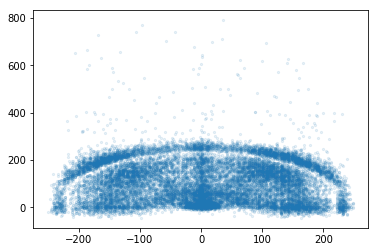

In [40]:
plt.scatter(shot['loc_x'], shot['loc_y'], s=5, alpha = 0.1 )
plt.show()

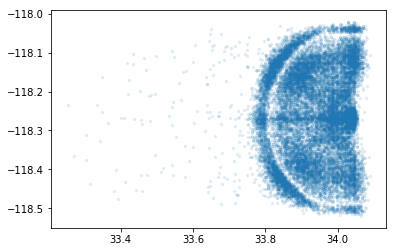

In [41]:
plt.scatter(shot['lat'], shot['lon'], s=5, alpha = 0.1 )
plt.show()

# 'lat'/'lon' and 'loc_x'/'loc_y' are the same thing, thus we can drop one pair

In [42]:
#'minutes_remaining' & 'seconds_remaining' were dropped because of the new feature 'time_remaining', which is a combination of both
#'combined_shot_type' is a summary of 'action_type', and the rest were all redundant
shot.drop(['combined_shot_type', 'lat', 'lon', 'game_event_id', 'game_id', 'team_id', 'team_name', 'matchup', 'game_date', 'minutes_remaining', 'seconds_remaining', 'season'], axis=1 , inplace=True)
#shot['year'] = shot['season'].dt.year
shot.head()

,action_type,loc_x,loc_y,period,playoffs,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,shot_id,time_remaining,home/away,game_year,game_month
1,Jump Shot,-157,0,1,0,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,2,622,AWAY,2000,10
2,Jump Shot,-101,135,1,0,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,POR,3,465,AWAY,2000,10
3,Jump Shot,138,175,1,0,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,POR,4,412,AWAY,2000,10
4,Driving Dunk Shot,0,0,2,0,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,POR,5,379,AWAY,2000,10
5,Jump Shot,-145,-11,3,0,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,6,572,AWAY,2000,10


In [43]:
shot.columns

Index(['action_type', 'loc_x', 'loc_y', 'period', 'playoffs', 'shot_distance',
       'shot_made_flag', 'shot_type', 'shot_zone_area', 'shot_zone_basic',
       'shot_zone_range', 'opponent', 'shot_id', 'time_remaining', 'home/away',
       'game_year', 'game_month'],
      dtype='object')

In [44]:
#our features and label
X = shot[['action_type', 'loc_x', 'loc_y', 'period', 'playoffs',
       'shot_distance', 'shot_type', 'shot_zone_area',
       'shot_zone_basic', 'shot_zone_range', 'opponent', 'shot_id',
       'time_remaining', 'home/away', 'game_year', 'game_month']]
Y = shot[['shot_made_flag']]

In [45]:
#Get dummy variables for our categorical data
shot.dummies = pd.get_dummies(X)
shot.dummies.columns

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  from ipykernel import kernelapp as app


Index(['loc_x', 'loc_y', 'period', 'playoffs', 'shot_distance', 'shot_id',
       'time_remaining', 'action_type_Alley Oop Dunk Shot',
       'action_type_Alley Oop Layup shot', 'action_type_Cutting Layup Shot',
       ...
       'game_year_2016', 'game_month_01', 'game_month_02', 'game_month_03',
       'game_month_04', 'game_month_05', 'game_month_06', 'game_month_10',
       'game_month_11', 'game_month_12'],
      dtype='object', length=147)

In [46]:
#split the testing and training data
X_train, X_test, y_train, y_test = train_test_split(shot.dummies.values, Y, test_size = 0.3)

In [47]:
#scale the numerical data 
scaler = StandardScaler()
X_train[:, [0, 1, 2, 3, 4, 5]] = scaler.fit_transform(X_train[:, [0, 1, 2, 3, 4, 5]])
X_test[:, [0, 1, 2, 3, 4, 5]] = scaler.fit_transform(X_test[:, [0, 1, 2, 3, 4, 5]])

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [48]:
# After trying random forest and adaboost algorithms, it seems a logistic regression does the best, so that's what we'll use
lr = LogisticRegression()
model1 = lr.fit(X_train, y_train)




/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
y_pred1 = model1.predict(X_test)




In [50]:
#accuracy metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))


Accuracy: 0.6783398184176395


In [51]:
#more accuracy metrics
#the total number of true positives divided by the total number of all predicted positives (tp/ (tp+fp))
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred1))

#the total number of true positives  divided by the total number of actual positives, predicted correctly and incorrectly (tp/ (tp+fn))
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred1))


0.7183226982680037
0.4584060500290867


In [52]:
#accuracy metrics part 3
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
cm


array([[3654,  618],
       [1862, 1576]])